In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import jieba
import jieba.analyse
from wordcloud import WordCloud

In [5]:
# !pip install pandas nump matplotlib jieba wordcloud scikit-learn warnings

ERROR: Could not find a version that satisfies the requirement nump (from versions: none)
ERROR: No matching distribution found for nump


# 读取数据

In [64]:
df = pd.read_excel("douban_book_250.xlsx")

# 观察数据

In [30]:
df.head()

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
0,1,红楼梦,[清] 曹雪芹 著,人民文学出版社,1996-12,都云作者痴，谁解其中味？,9.6,413885,59.70元,《红楼梦》是一部百科全书式的长篇小说。以宝黛爱情悲剧为主线，以四大家族的荣辱兴衰为背景，描绘...
1,2,活着,余华,作家出版社,2012-8-1,生的苦难与伟大,9.4,806552,20.00元,《活着(新版)》讲述了农村人福贵悲惨的人生遭遇。福贵本是个阔少爷，可他嗜赌如命，终于赌光了家...
2,3,1984,[英] 乔治·奥威尔 刘绍铭,北京十月文艺出版社,2010-4-1,栗树荫下，我出卖你，你出卖我,9.4,275815,28.00,★ 村上春树以《1Q84》向本书致敬 ★ 著名学者刘绍铭经典译本内地首次出版 ★...
3,4,三体全集 : 地球往事三部曲,刘慈欣,重庆出版社,2012-1,地球往事三部曲,9.5,178124,168.00元,《地球往事·三体》 文化大革命如火如荼进行的同时，军方探寻外星文明的绝秘计划“红岸工程...
4,5,哈利·波特,J.K.罗琳 (J.K.Rowling) 苏农,人民文学出版社,2008-12-1,从9¾站台开始的旅程,9.7,99452,498.00元,《哈利 · 波特 (共 7 册)(精)》编著者 J.K. 罗琳。 《哈利 · ...


# 排序

In [3]:
df.sort_values("people_num",ascending=False)#降序

,book_name,authors,publisher,pub_time,desc,score,people_num,price
1,活着,余华,作家出版社,2012-8-1,生的苦难与伟大,9.4,807701,20.00元
51,追风筝的人,[美] 卡勒德·胡赛尼 李继宏,上海人民出版社,2006-5,为你，千千万万遍,8.9,785415,29.00元
223,解忧杂货店,[日] 东野圭吾 李盈春,南海出版公司,2014-5,现代人内心流失的东西，这家杂货店能帮你找回,8.5,752331,39.50元
12,小王子,[法] 圣埃克苏佩里 马振聘,人民文学出版社,2003-8,献给长成了大人的孩子们,9.1,743614,22.00元
61,嫌疑人X的献身,[日] 东野圭吾 刘子倩,南海出版公司,2008-9,数学好是一种极致的浪漫,8.9,515385,28.00
...,...,...,...,...,...,...,...,...
242,坟,鲁迅,人民文学出版社,2006-12,NaN,9.6,11467,16.00元
226,会饮篇,[古希腊] 柏拉图 王太庆,商务印书馆,2013-1,NaN,9.3,11034,12.00元
237,规训与惩罚 : 监狱的诞生,[法] 米歇尔·福柯 刘北成,生活·读书·新知三联书店,2003-1,伴随着惩罚的人性化，自由反而日益丧失了,9.3,10552,21.80元
249,跨越边界的社区（修订版） : 北京“浙江村”的生活史,项飙,生活·读书·新知三联书店,2018-3,NaN,9.5,9032,68.00元


In [4]:
df.sort_values("score",ascending=False)

,book_name,authors,publisher,pub_time,desc,score,people_num,price
169,南京大屠杀 : 第二次世界大战中被遗忘的大浩劫,[美]张纯如（Iris Chang） 谭春霞,中信出版社,2015-8,NaN,9.7,15442,49.00元
4,哈利·波特,J.K.罗琳 (J.K.Rowling) 苏农,人民文学出版社,2008-12-1,从9¾站台开始的旅程,9.7,99734,498.00元
101,毛泽东选集 第一卷,毛泽东,人民出版社,1991-6,NaN,9.6,26500,40.00元
0,红楼梦,[清] 曹雪芹 著,人民文学出版社,1996-12,都云作者痴，谁解其中味？,9.6,414261,59.70元
242,坟,鲁迅,人民文学出版社,2006-12,NaN,9.6,11467,16.00元
...,...,...,...,...,...,...,...,...
187,情书,[日] 岩井俊二 穆晓芳,天津人民出版社,2004-7,一场同名同姓的误会，两段可贵的爱情,8.6,106158,18.00元
220,骆驼祥子,老舍,人民文学出版社,2000-3-1,旧中国老北京贫苦市民的典型命运,8.6,204517,12.00
233,金锁记,张爱玲,哈尔滨出版社,2005-6,一个小商人家庭出身的女子曹七巧的心灵变迁历程,8.6,62000,13.5元
231,目送,龙应台,生活·读书·新知三联书店,2009-10,不必追,8.6,210738,39.00元


# 数据筛选

In [66]:
author_list = ["鲁迅","三毛","金庸","王小波"]

filtered_authors_df = df[df['authors'].isin(author_list)]


In [77]:
filtered_authors_df.head(2) #看前两行

,ranking,book_name,authors,publisher,pub_time,desc,score,people_num,price,intro
13,14,撒哈拉的故事,三毛,哈尔滨出版社,2003-8,游荡的自由灵魂,9.2,167776,15.80元,安徒生是丹麦19世纪著名童话作家，世界文学童话创始人。他生于欧登塞城一个贫苦鞋匠家庭，早年在...
15,16,天龙八部,金庸,生活·读书·新知三联书店,1994-5,有情皆孽，无人不冤,9.2,130360,96.00元,天龙八部乃金笔下的一部长篇小说，与《射雕》，《神雕》等 几部长篇小说一起被称为可读性最高的金...


# 单变量分析

## 类别变量

In [17]:
df[["publisher"]].value_counts()

publisher   
人民文学出版社         38
上海译文出版社         22
生活·读书·新知三联书店    19
译林出版社           14
南海出版公司          12
                ..
广西美术出版社          1
文汇出版社            1
时代文艺出版社          1
春风文艺出版社          1
陕西人民出版社          1
Length: 72, dtype: int64

In [18]:
df[["authors"]].value_counts()

authors           
鲁迅                    6
三毛                    6
金庸                    5
王小波                   5
龙应台                   4
                     ..
[美] 艾·弗洛姆  李健鸣        1
[美] 艾萨克·阿西莫夫  叶李华     1
[美] 艾萨克·阿西莫夫  崔正男     1
[美] 贾雷德·戴蒙德  谢延光      1
（清）沈复                 1
Length: 202, dtype: int64

In [71]:
table = filtered_authors_df[["authors"]].value_counts()

<Axes: >

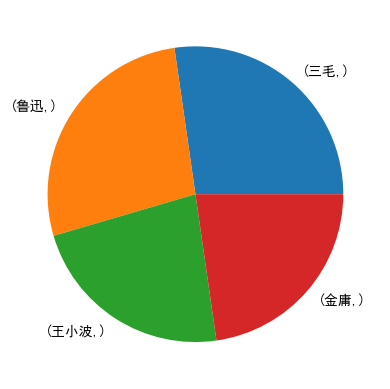

In [72]:
table.plot.pie()

<Axes: xlabel='authors'>

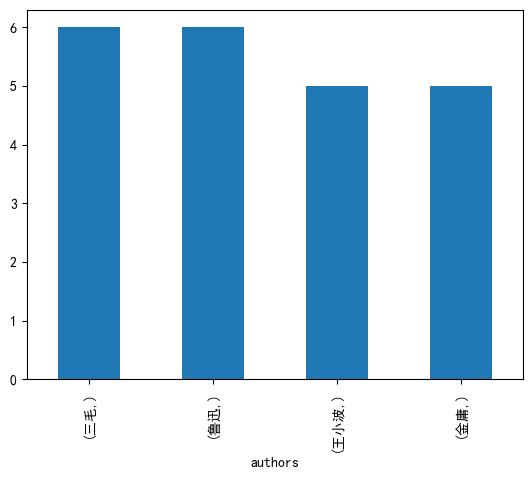

In [73]:
table.plot.bar()

## 数值变量

In [5]:
df["score"].describe()

count    250.000000
mean       9.054000
std        0.245449
min        8.500000
25%        8.900000
50%        9.100000
75%        9.200000
max        9.700000
Name: score, dtype: float64

<Axes: ylabel='Density'>

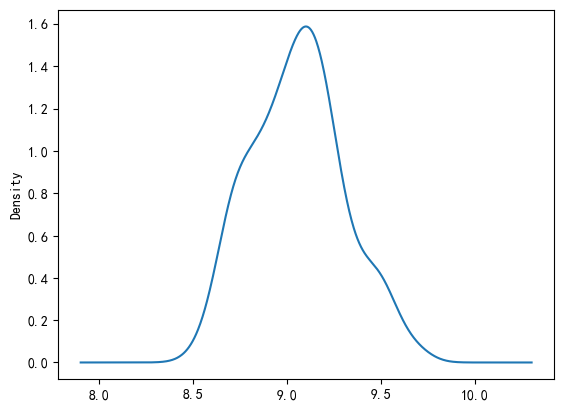

In [20]:
df["score"].plot.kde() #核密度图

In [6]:
df["people_num"].describe()

count       250.000000
mean      86273.204000
std      120755.120259
min        8574.000000
25%       24245.250000
50%       46869.000000
75%       90836.250000
max      807701.000000
Name: people_num, dtype: float64

<Axes: ylabel='Frequency'>

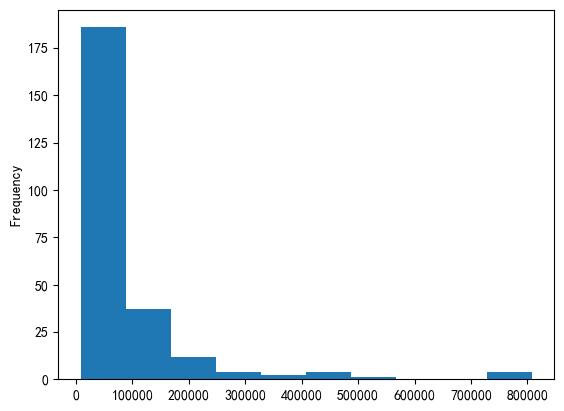

In [22]:
df["people_num"].plot.hist()

# 多变量分析

## 类别变量+数值变量

In [23]:
df.groupby(by="authors").score.mean() # 不同作者书籍的平均评分

authors
(俄罗斯) 陀思妥耶夫斯基  曾思艺           9.300
(德)叔本华  韦启昌                  9.200
J.K.罗琳 (J.K.Rowling)  苏农     9.700
[以色列] 尤瓦尔·赫拉利  林俊宏           9.100
[俄] 列夫·托尔斯泰  草婴              9.200
                             ...  
鲁迅                           9.350
黄元吉                          9.500
龙应台                          8.675
（丹麦）安徒生  叶君健                 9.300
（清）沈复                        8.700
Name: score, Length: 202, dtype: float64

In [34]:
pd.pivot_table(df,index=["publisher"],values=["score","people_num"],aggfunc=np.mean)

,people_num,score
publisher,,
1981-8,130422.000000,9.300000
万卷出版公司,20500.000000,9.100000
上海三联书店,109487.000000,8.850000
上海人民出版社,170108.000000,9.000000
上海古籍出版社,33725.000000,9.200000
...,...,...
译林出版社,55064.428571,8.971429
辽宁教育出版社,33976.000000,9.200000
重庆出版社,97985.500000,9.500000


In [74]:
filtered_authors_df .groupby(by="authors").score.mean() # 不同作者书籍的平均评分

authors
三毛     8.966667
王小波    8.940000
金庸     9.000000
鲁迅     9.350000
Name: score, dtype: float64

In [76]:
pd.pivot_table(filtered_authors_df ,index=["authors"],values=["score","people_num"],aggfunc=np.mean)

,people_num,score
authors,,
三毛,74035.000000,8.966667
王小波,95179.000000,8.940000
金庸,87942.400000,9.000000
鲁迅,77612.333333,9.350000


## 数值变量+数值变量

相关分析：
- 取值范围：-1~1
- 大于0代表正相关，小于0代表负相关
- 绝对值越接近0代表关联度越小，绝对值越接近1代表关联度越大

In [24]:
df[["score","people_num"]].corr()

,score,people_num
score,1.000000,-0.089427
people_num,-0.089427,1.000000


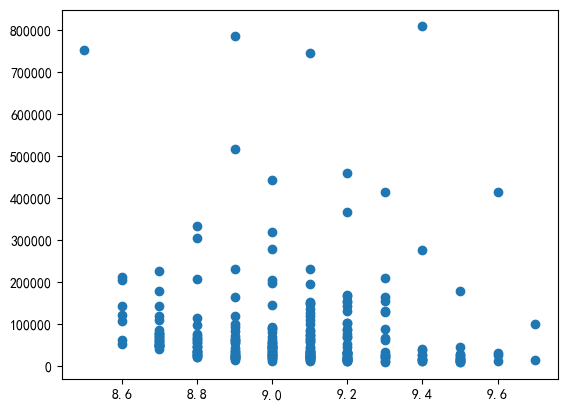

In [25]:
plt.scatter(df.score,df.people_num)

# 文本分析

In [102]:
stop_words_file = "stopwords.txt"


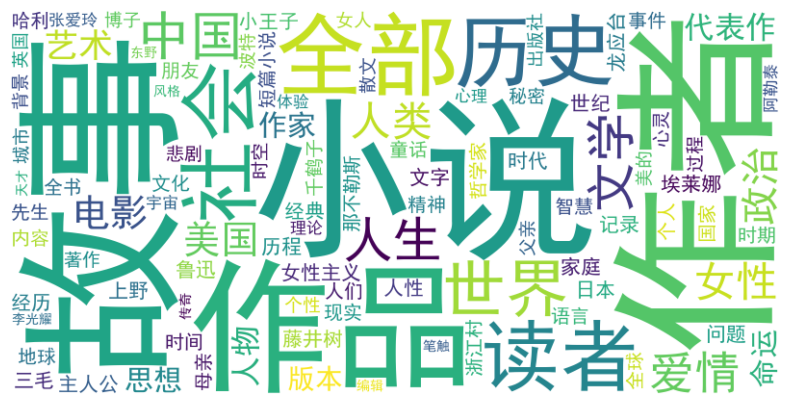

In [103]:
import jieba

# 使用jieba进行中文分词
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

# 对DataFrame的'intro'列应用中文分词
df['intro_segmented'] = df['intro'].apply(chinese_segmentation)

# 从外部文件读取停用词列表
stop_words_file = "stopwords.txt"
with open(stop_words_file, 'r', encoding='utf-8') as f:
    stop_words = set(f.read().splitlines())

# 创建词云，并排除停用词
def generate_wordcloud(text):
    # 使用 jieba.analyse.extract_tags 提取关键词
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))#allowPOS=('n', 'nr', 'ns')：表示仅考虑名词（'n'）、人名（'nr'）、地名（'ns'）等词性的词语作为关键词。这是通过词性标注来筛选关键词的一种方式。

    # 构建关键词和权重的字典
    keywords_dict = {word: weight for word, weight in keywords}

    # 创建词云
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100, 
        collocations=False, 
        font_path='simhei.ttf',  # 使用支持中文的字体
        stopwords=stop_words
    ).generate_from_frequencies(keywords_dict)
    
    # 显示词云图像
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 对所有'intro_segmented'文本进行拼接
all_intro_text = " ".join(df['intro_segmented'])

# 生成并显示词云
generate_wordcloud(all_intro_text)
